In [ ]:
!pip install pyspark py4j

# **Cause of Deaths Around the World**

![heartrate monitoring screen](https://img.freepik.com/premium-vector/red-line-show-heart-rate-while-dead-chart-monitor_72857-67.jpg)

This project will analyze the causes of human deaths worldwide from 1990 to 2019 using PySpark and SQL, and visualize the data using Seaborn. By the end of this project, the following questions will be answered:

1. What are the top 10 causes of deaths around the world?
2. How have the causes of deaths changed over the years from 1990 to 2019
3. Which countries have the highest number of deaths attributed to the leading cause of death?

In [ ]:
# Import libraries
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize SparkSession
spark = SparkSession.builder \
    .appName('CauseOfDeaths') \
    .getOrCreate()

# Inspecting the data

In [ ]:
# Load data CSV File into a DataFrame
df = spark.read.csv('cause-of-deaths-around-the-world.csv', header=True, inferSchema=True)

# Count the number of rows
row_count = df.count()
print(f'The number of rows in the DataFrame: {row_count}')

df.show()
df.printSchema()

The number of rows in the DataFrame: 6120
+-----------------+----+----+----------+---------------------------------------+-------------------+------------------------+-------+--------+----------------------+------------------+--------+------------------+------------+-----------------------+----------------------------+------------------+---------------------+---------+----------------------------+------------------+------------------------------------+---------+----------------------+-----------------+----------------------+----------+---------------------------+-------------+----------------------------+------------------------------------------+------------------+------------------------------+---------------+
|Country/Territory|Code|Year|Meningitis|Alzheimer's Disease and Other Dementias|Parkinson's Disease|Nutritional Deficiencies|Malaria|Drowning|Interpersonal Violence|Maternal Disorders|HIV/AIDS|Drug Use Disorders|Tuberculosis|Cardiovascular Diseases|Lower Respiratory Infections|

## Q1. What are the top 10 causes of deaths around the world?

In [ ]:
# Query to sum all the causes of death globally and order them
query_top_10 = """
SELECT
    Cause,
    SUM(Deaths) AS Count
FROM (
    SELECT 'Meningitis' AS Cause, Meningitis AS Deaths FROM cause_of_deaths UNION ALL
    SELECT 'Alzheimer''s Disease and Other Dementias', `Alzheimer's Disease and Other Dementias` FROM cause_of_deaths UNION ALL
    SELECT 'Parkinson''s Disease', `Parkinson's Disease` FROM cause_of_deaths UNION ALL
    SELECT 'Nutritional Deficiencies', `Nutritional Deficiencies` FROM cause_of_deaths UNION ALL
    SELECT 'Malaria', Malaria FROM cause_of_deaths UNION ALL
    SELECT 'Drowning', Drowning FROM cause_of_deaths UNION ALL
    SELECT 'Interpersonal Violence', `Interpersonal Violence` FROM cause_of_deaths UNION ALL
    SELECT 'Maternal Disorders', `Maternal Disorders` FROM cause_of_deaths UNION ALL
    SELECT 'HIV/AIDS', `HIV/AIDS` FROM cause_of_deaths UNION ALL
    SELECT 'Drug Use Disorders', `Drug Use Disorders` FROM cause_of_deaths UNION ALL
    SELECT 'Tuberculosis', Tuberculosis FROM cause_of_deaths UNION ALL
    SELECT 'Cardiovascular Diseases', `Cardiovascular Diseases` FROM cause_of_deaths UNION ALL
    SELECT 'Lower Respiratory Infections', `Lower Respiratory Infections` FROM cause_of_deaths UNION ALL
    SELECT 'Neonatal Disorders', `Neonatal Disorders` FROM cause_of_deaths UNION ALL
    SELECT 'Alcohol Use Disorders', `Alcohol Use Disorders` FROM cause_of_deaths UNION ALL
    SELECT 'Self-harm', `Self-harm` FROM cause_of_deaths UNION ALL
    SELECT 'Exposure to Forces of Nature', `Exposure to Forces of Nature` FROM cause_of_deaths UNION ALL
    SELECT 'Diarrheal Diseases', `Diarrheal Diseases` FROM cause_of_deaths UNION ALL
    SELECT 'Environmental Heat and Cold Exposure', `Environmental Heat and Cold Exposure` FROM cause_of_deaths UNION ALL
    SELECT 'Neoplasms', Neoplasms FROM cause_of_deaths UNION ALL
    SELECT 'Conflict and Terrorism', `Conflict and Terrorism` FROM cause_of_deaths UNION ALL
    SELECT 'Diabetes Mellitus', `Diabetes Mellitus` FROM cause_of_deaths UNION ALL
    SELECT 'Chronic Kidney Disease', `Chronic Kidney Disease` FROM cause_of_deaths UNION ALL
    SELECT 'Poisonings', Poisonings FROM cause_of_deaths UNION ALL
    SELECT 'Protein-Energy Malnutrition', `Protein-Energy Malnutrition` FROM cause_of_deaths UNION ALL
    SELECT 'Road Injuries', `Road Injuries` FROM cause_of_deaths UNION ALL
    SELECT 'Chronic Respiratory Diseases', `Chronic Respiratory Diseases` FROM cause_of_deaths UNION ALL
    SELECT 'Cirrhosis and Other Chronic Liver Diseases', `Cirrhosis and Other Chronic Liver Diseases` FROM cause_of_deaths UNION ALL
    SELECT 'Digestive Diseases', `Digestive Diseases` FROM cause_of_deaths UNION ALL
    SELECT 'Fire, Heat, and Hot Substances', `Fire, Heat, and Hot Substances` FROM cause_of_deaths UNION ALL
    SELECT 'Acute Hepatitis', `Acute Hepatitis` FROM cause_of_deaths
) AS deaths_by_cause
GROUP BY Cause
ORDER BY Count DESC
LIMIT 10
"""

# Execute the query
top_10_causes = spark.sql(query_top_10)

# Show the top 10 causes of death
top_10_causes.show()

+--------------------+---------+
|               Cause|    Count|
+--------------------+---------+
|Cardiovascular Di...|447741982|
|           Neoplasms|229758538|
|Chronic Respirato...|104605334|
|Lower Respiratory...| 83770038|
|  Neonatal Disorders| 76860729|
|  Diarrheal Diseases| 66235508|
|  Digestive Diseases| 65638635|
|        Tuberculosis| 45850603|
|Cirrhosis and Oth...| 37479321|
|            HIV/AIDS| 36364419|
+--------------------+---------+



<ipython-input-104-8d06c569e33f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Cause', data=top_10_causes_pd, palette='viridis')


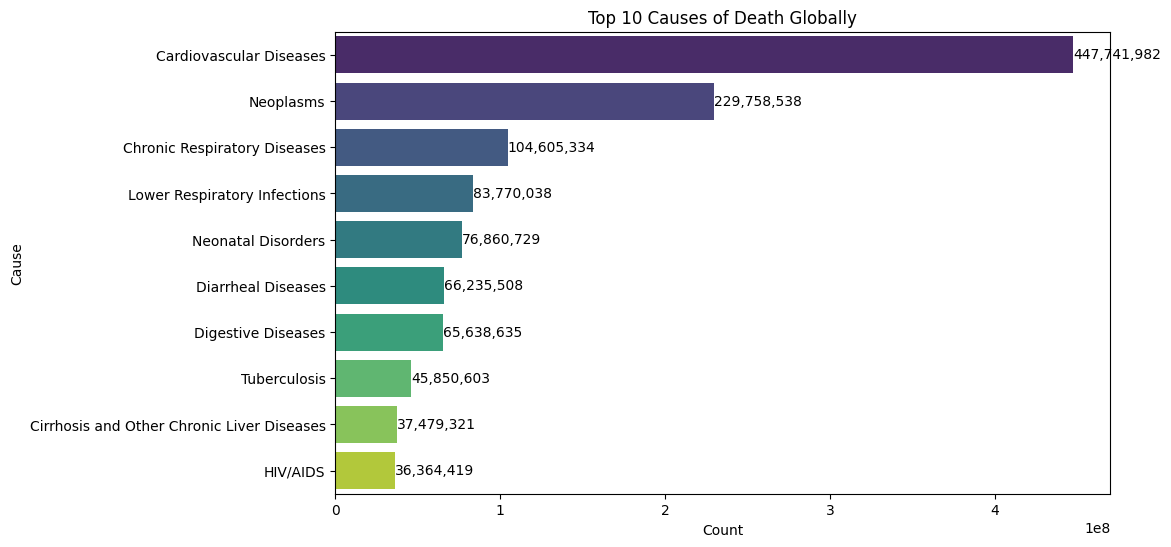

In [ ]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Cause', data=top_10_causes_pd, palette='viridis')

# Annotate the bars with the actual death counts
for index, value in enumerate(top_10_causes_pd['Count']):
    barplot.annotate(f'{value:,.0f}', xy=(value, index), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Cause')
plt.title('Top 10 Causes of Death Globally')
plt.show()

## Q2. How have the causes of deaths changed over the years from 1990 to 2019

In [ ]:
# Define the SQL query to aggregate deaths over years for the top 10 causes
query_top_causes_over_years = f"""
SELECT
    Year,
    Cause,
    SUM(Deaths) AS Deaths
FROM (
    SELECT
        Year,
        'Meningitis' AS Cause, Meningitis AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Alzheimer''s Disease and Other Dementias', `Alzheimer's Disease and Other Dementias` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Parkinson''s Disease', `Parkinson's Disease` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Nutritional Deficiencies', `Nutritional Deficiencies` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Malaria', Malaria AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Drowning', Drowning AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Interpersonal Violence', `Interpersonal Violence` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Maternal Disorders', `Maternal Disorders` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'HIV/AIDS', `HIV/AIDS` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Drug Use Disorders', `Drug Use Disorders` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Tuberculosis', Tuberculosis AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Cardiovascular Diseases', `Cardiovascular Diseases` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Lower Respiratory Infections', `Lower Respiratory Infections` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Neonatal Disorders', `Neonatal Disorders` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Alcohol Use Disorders', `Alcohol Use Disorders` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Self-harm', `Self-harm` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Exposure to Forces of Nature', `Exposure to Forces of Nature` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Diarrheal Diseases', `Diarrheal Diseases` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Environmental Heat and Cold Exposure', `Environmental Heat and Cold Exposure` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Neoplasms', Neoplasms AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Conflict and Terrorism', `Conflict and Terrorism` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Diabetes Mellitus', `Diabetes Mellitus` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Chronic Kidney Disease', `Chronic Kidney Disease` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Poisonings', Poisonings AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Protein-Energy Malnutrition', `Protein-Energy Malnutrition` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Road Injuries', `Road Injuries` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Chronic Respiratory Diseases', `Chronic Respiratory Diseases` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Cirrhosis and Other Chronic Liver Diseases', `Cirrhosis and Other Chronic Liver Diseases` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Digestive Diseases', `Digestive Diseases` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Fire, Heat, and Hot Substances', `Fire, Heat, and Hot Substances` AS Deaths FROM cause_of_deaths UNION ALL
        SELECT
        Year,
        'Acute Hepatitis', `Acute Hepatitis` AS Deaths FROM cause_of_deaths
) AS deaths_by_cause
WHERE Year BETWEEN 1990 AND 2019
    AND Cause IN {tuple(top_10_causes_list)}
GROUP BY Year, Cause
ORDER BY Year, Cause
"""

# Execute the query to get the data for top 10 causes over years
top_causes_over_years = spark.sql(query_top_causes_over_years).toPandas()

# Display the first few rows of the data to verify structure
print(top_causes_over_years.head())

   Year                                       Cause    Deaths
0  1990                     Cardiovascular Diseases  12062179
1  1990                Chronic Respiratory Diseases   3092759
2  1990  Cirrhosis and Other Chronic Liver Diseases   1012423
3  1990                          Diarrheal Diseases   2894957
4  1990                          Digestive Diseases   1854392


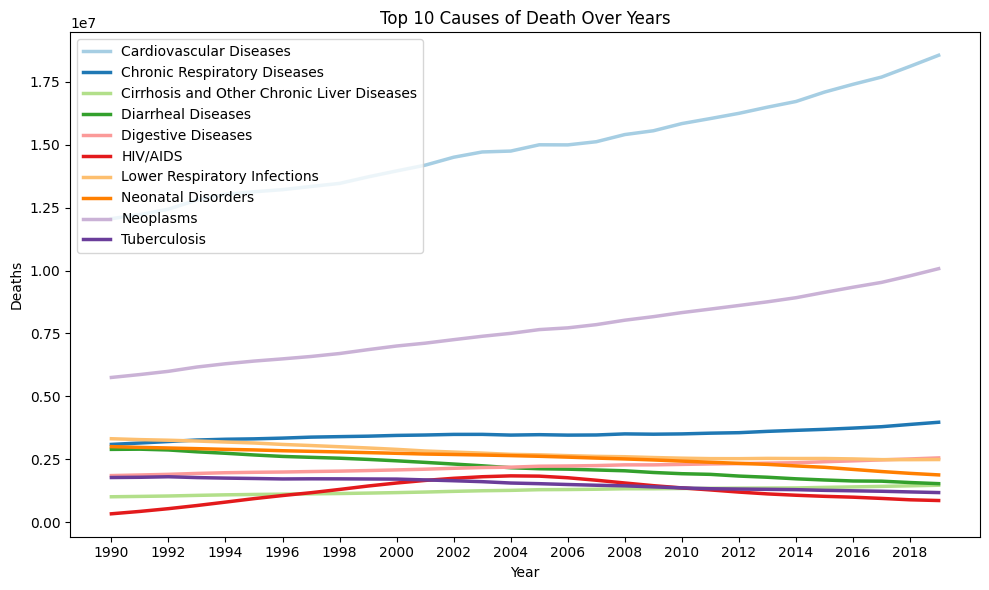

In [ ]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Deaths', hue='Cause', data=top_causes_over_years, palette='Paired', linewidth=2.5)
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Top 10 Causes of Death Over Years')
plt.legend(loc='upper left')

# Customize x-axis ticks to show every 2 years
plt.xticks(range(1990, 2020, 2))

plt.tight_layout()
plt.show()

# Q3. Which countries have the highest number of deaths attributed to the leading causes of deaths?


In [ ]:
# Define the SQL query for Cardiovascular Diseases
query_top_cardio_causes_by_country = """
SELECT
    `Country/Territory` AS Country,
    'Cardiovascular Diseases' AS Cause,
    SUM(`Cardiovascular Diseases`) AS Count
FROM cause_of_deaths_by_country
GROUP BY `Country/Territory`
ORDER BY Count DESC
LIMIT 10
"""

# Execute the query
top_cardio_causes_by_country = spark.sql(query_top_cardio_causes_by_country)

# Show the top causes of death by country
top_cardio_causes_by_country.show()

+-------------+--------------------+---------+
|      Country|               Cause|    Count|
+-------------+--------------------+---------+
|        China|Cardiovascular Di...|100505973|
|        India|Cardiovascular Di...| 52994710|
|       Russia|Cardiovascular Di...| 33903781|
|United States|Cardiovascular Di...| 26438346|
|    Indonesia|Cardiovascular Di...| 13587011|
|      Ukraine|Cardiovascular Di...| 13053052|
|      Germany|Cardiovascular Di...| 10819770|
|       Brazil|Cardiovascular Di...|  9589019|
|        Japan|Cardiovascular Di...|  9210437|
|     Pakistan|Cardiovascular Di...|  7745192|
+-------------+--------------------+---------+



<ipython-input-101-12b8f9b9f243>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Country', data=top_cardio_causes_pd, palette='viridis')


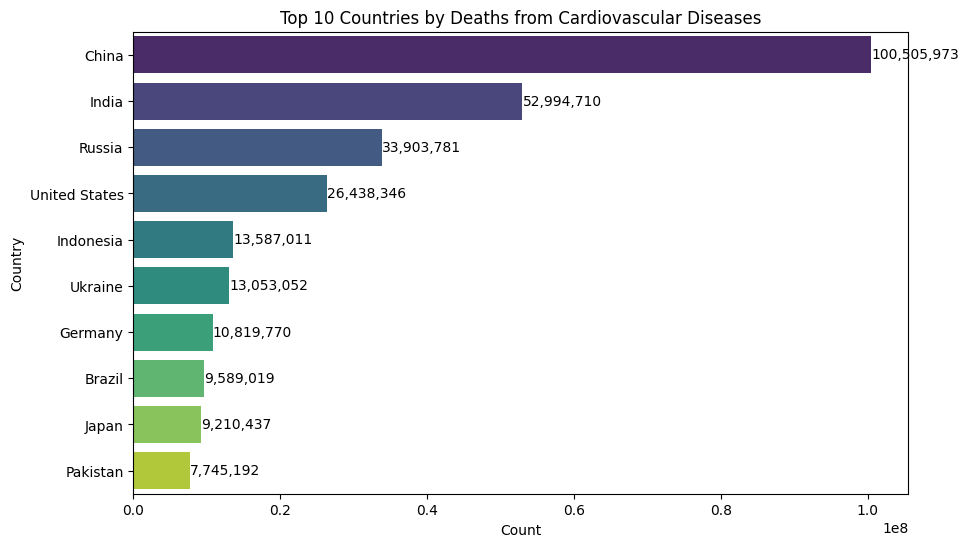

In [ ]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Country', data=top_cardio_causes_pd, palette='viridis')

# Annotate the bars with the actual death counts
for index, value in enumerate(top_cardio_causes_pd['Count']):
    barplot.annotate(f'{value:,.0f}', xy=(value, index), ha='left', va='center')

plt.title('Top 10 Countries by Deaths from Cardiovascular Diseases')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [ ]:
# Define the SQL query for Neoplasms
query_top_neoplasms_causes_by_country = """
SELECT
    `Country/Territory` AS Country,
    'Neoplasms' AS Cause,
    SUM(Neoplasms) AS Count
FROM cause_of_deaths_by_country
GROUP BY `Country/Territory`
ORDER BY Count DESC
LIMIT 10
"""

# Execute the query
top_neoplasms_causes_by_country = spark.sql(query_top_neoplasms_causes_by_country)

# Show the top causes of death by country
top_neoplasms_causes_by_country.show()

+--------------+---------+--------+
|       Country|    Cause|   Count|
+--------------+---------+--------+
|         China|Neoplasms|61060527|
| United States|Neoplasms|18905315|
|         India|Neoplasms|17762703|
|         Japan|Neoplasms|10530449|
|        Russia|Neoplasms| 9079313|
|       Germany|Neoplasms| 7325650|
|        Brazil|Neoplasms| 5606779|
|United Kingdom|Neoplasms| 5182471|
|         Italy|Neoplasms| 5173525|
|        France|Neoplasms| 5067099|
+--------------+---------+--------+



<ipython-input-103-0796d03687d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Country', data=top_neoplasms_causes_by_country.toPandas(), palette='viridis')


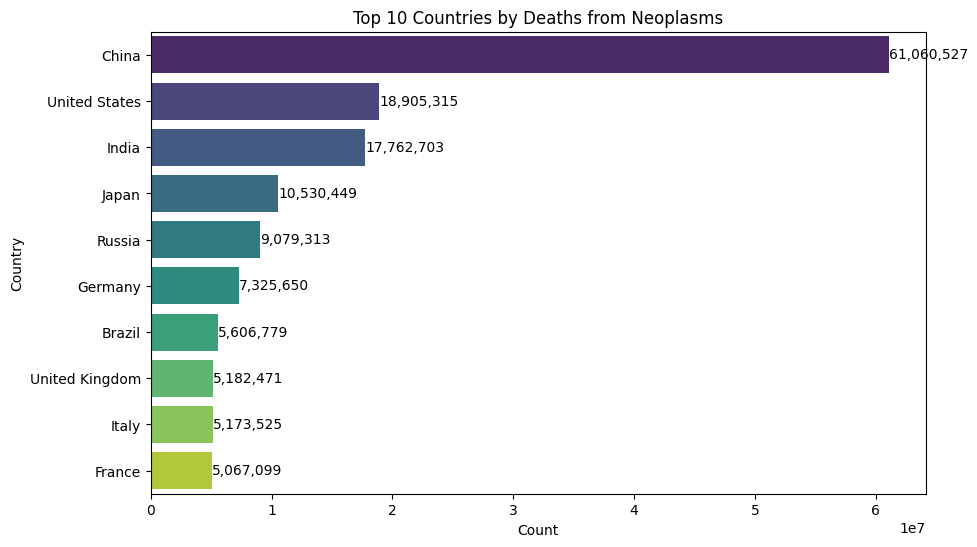

In [ ]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Country', data=top_neoplasms_causes_by_country.toPandas(), palette='viridis')

# Annotate the bars with the actual death counts
for index, value in enumerate(top_neoplasms_causes_by_country.toPandas()['Count']):
    barplot.annotate(f'{value:,.0f}', xy=(value, index), ha='left', va='center')

plt.title('Top 10 Countries by Deaths from Neoplasms')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [ ]:
# Define the SQL query for Chronic Respiratory Diseases
query_top_chronic_resp_causes_by_country = """
SELECT
    `Country/Territory` AS Country,
    'Chronic Respiratory Diseases' AS Cause,
    SUM(`Chronic Respiratory Diseases`) AS Count
FROM cause_of_deaths_by_country
GROUP BY `Country/Territory`
ORDER BY Count DESC
LIMIT 10
"""

# Execute the query
top_chronic_resp_causes_by_country = spark.sql(query_top_chronic_resp_causes_by_country)

# Show the top causes of death by country
top_chronic_resp_causes_by_country.show()

+--------------+--------------------+--------+
|       Country|               Cause|   Count|
+--------------+--------------------+--------+
|         China|Chronic Respirato...|36676826|
|         India|Chronic Respirato...|25232974|
| United States|Chronic Respirato...| 4949052|
|     Indonesia|Chronic Respirato...| 2559457|
|      Pakistan|Chronic Respirato...| 2276479|
|    Bangladesh|Chronic Respirato...| 1750541|
|        Brazil|Chronic Respirato...| 1743233|
|        Russia|Chronic Respirato...| 1518195|
|United Kingdom|Chronic Respirato...| 1293421|
|       Myanmar|Chronic Respirato...| 1253201|
+--------------+--------------------+--------+



<ipython-input-107-258531bbe460>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Country', data=top_chronic_resp_causes_by_country.toPandas(), palette='viridis')


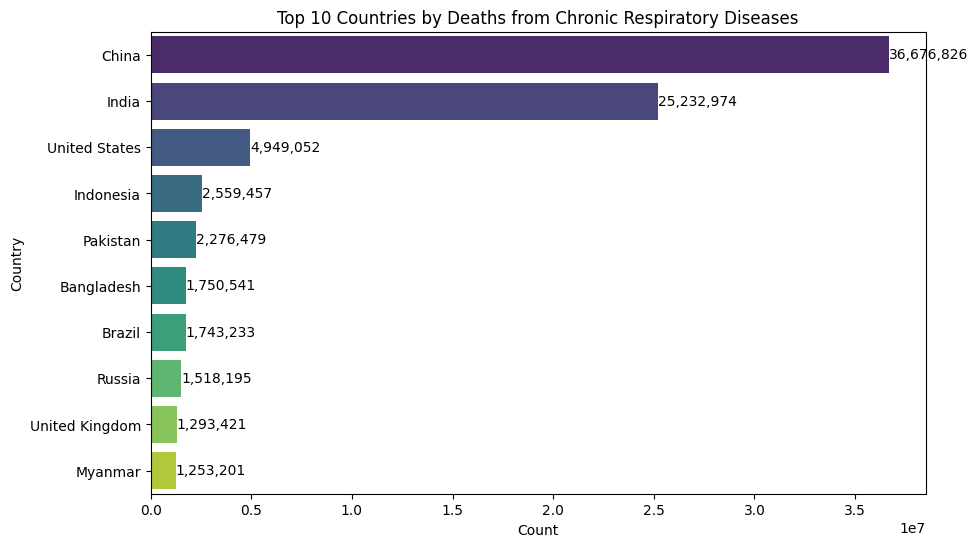

In [ ]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Country', data=top_chronic_resp_causes_by_country.toPandas(), palette='viridis')

# Annotate the bars with the actual death counts
for index, value in enumerate(top_chronic_resp_causes_by_country.toPandas()['Count']):
    barplot.annotate(f'{value:,.0f}', xy=(value, index), ha='left', va='center')

plt.title('Top 10 Countries by Deaths from Chronic Respiratory Diseases')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()